In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
import os
import pandas as pd
import numpy as np
from math import sqrt
from tqdm import tqdm_notebook as tqdm

In [2]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/GitHub/AI-ExpertFW-Prj/dataset')

mc_rr_df_read = pd.read_excel('modcolth_rentway_integra_data3_imputed.xlsx')

KeyboardInterrupt: ignored

### EDA 및 데이터 전처리

In [4]:
mc_rr_df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265678 entries, 0 to 265677
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_id          265678 non-null  int64  
 1   size             265678 non-null  int64  
 2   rating           265678 non-null  int64  
 3   category         265678 non-null  object 
 4   user_name        74542 non-null   object 
 5   length           74518 non-null   object 
 6   fit              265678 non-null  object 
 7   user_id          265678 non-null  int64  
 8   review_summary   265678 non-null  object 
 9   review_text      265678 non-null  object 
 10  waist            74542 non-null   float64
 11  hips             74542 non-null   float64
 12  bust_size        265678 non-null  float64
 13  height           265678 non-null  float64
 14  cup_size_in_cms  265678 non-null  float64
 15  rented_for       191136 non-null  object 
 16  body_type        176687 non-null  obje

In [ ]:
537285
800975
1788819
2245184
2279954
2524821
2566975

df_gby_item_id['category'][537285]

array(['tops', 'dress'], dtype=object)

In [ ]:
gby_item_id = mc_rr_df_read.groupby(by = 'item_id')['category'].unique()

df_gby_item_id = pd.DataFrame(data = gby_item_id)

#df_gby_item_id[len(df_gby_item_id.loc[123373])]

sum = 0
for i in list(df_gby_item_id.index) :
  if len(df_gby_item_id['category'][i]) > 1 :
    sum += 1

print(sum)

7


In [ ]:
gby_item_id = mc_rr_df_read.groupby(by = 'item_id')['rented_for'].unique()

df_gby_item_id = pd.DataFrame(data = gby_item_id)

sum = 0
for i in list(df_gby_item_id.index) :
  if len(df_gby_item_id['rented_for'][i]) > 1 :
    sum += 1

print(sum)

5175


In [ ]:
mc_rr_df_read['category'].value_counts()

dress           92168
gown            44103
tops            19933
sheath          19149
dresses         18268
                ...  
sweatershirt        4
overcoat            2
sweatpants          2
crewneck            1
buttondown          1
Name: category, Length: 75, dtype: int64

In [5]:
mc_rr_df_read_cp = mc_rr_df_read.copy()

In [6]:
mc_rr_df_read_cp.replace({'category':['dresses', 'dress', 'shirtdress']}, 'dresses', inplace = True)
mc_rr_df_read_cp.replace({'category':['tops', 'top']}, 'tops', inplace = True)
mc_rr_df_read_cp.replace({'category':['bottoms', 'sweatpants', 'jeans', 'down']}, 'bottoms', inplace = True)
mc_rr_df_read_cp.replace({'category':['leggings', 'legging']}, 'leggings', inplace = True)
mc_rr_df_read_cp.replace({'category':['shirt', 't-shirt','sweatershirt', 'sweatshirt']}, 'shirts', inplace = True)
mc_rr_df_read_cp.replace({'category':['skirt', 'skirts']}, 'skirts', inplace = True)
mc_rr_df_read_cp.replace({'category':['coat', 'peacoat', 'overcoat']}, 'coats', inplace = True)

In [ ]:
mc_rr_df_read_cp['category'].value_counts()

dresses       111159
gown           44103
tops           24811
sheath         19149
bottoms        15433
               ...  
overalls           6
jogger             6
caftan             4
crewneck           1
buttondown         1
Name: category, Length: 62, dtype: int64

In [6]:
mc_rr_df_read_cp['rating'].value_counts()

5.0    150534
4.0     77384
3.0     28163
2.0      7352
1.0      2245
Name: rating, dtype: int64

In [7]:
mc_rr_df_read_cp['rating'] = mc_rr_df_read_cp['rating']/2

In [ ]:
mc_rr_df_read_cp.head()

,item_id,size,rating,category,user_name,length,fit,user_id,review_summary,review_text,waist,hips,bust_size,height,cup_size_in_cms,rented_for,body_type,age,review_date,weight
0,152702,4,4.0,new,avNYC,just right,small,668176,Too much ruching,"I liked the color, the silhouette, and the fab...",27.0,37.000000,32.0,167.64,14.5,NaN,NaN,NaN,NaN,NaN
1,152702,4,5.0,new,lanwei91,slightly short,fit,320759,Suits my body type!,From the other reviews it seems like this dres...,26.0,36.000000,34.0,167.64,16.5,NaN,NaN,NaN,NaN,NaN
2,152702,4,3.0,new,angeladevoe5678,just right,fit,144785,I love the design and fit,I love the design and fit of this dress! I wo...,25.0,35.765625,34.0,160.02,12.5,NaN,NaN,NaN,NaN,NaN
3,152702,4,3.0,new,Juli,slightly long,fit,52664,Beautiful Dress!,I bought this dress for work it is flattering...,25.0,35.000000,32.0,154.94,16.5,NaN,NaN,NaN,NaN,NaN
4,152702,4,5.0,new,lhalton,just right,fit,155439,This is a very profession,This is a very professional look. It is Great ...,25.0,32.000000,32.0,167.64,16.5,NaN,NaN,NaN,NaN,NaN


In [ ]:
total_users

In [ ]:
items_bought

In [11]:
all_users

1

In [12]:
mc_rr_df_read_cp.user_id.value_counts()

691468    435
32925     292
362951    228
45337     140
833675    127
         ... 
588832      1
802493      1
299191      1
414037      1
123612      1
Name: user_id, Length: 144335, dtype: int64

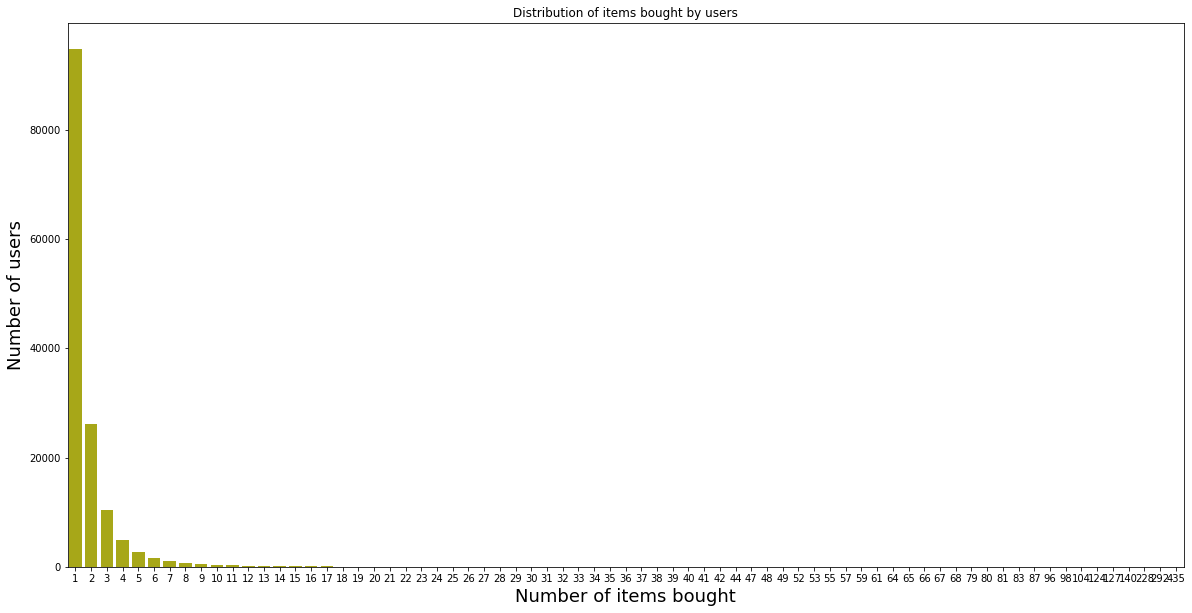

In [19]:
# Users who bought so many items
items_bought = []
total_users = []
for i in range(min(mc_rr_df_read_cp.user_id.value_counts()), max(mc_rr_df_read_cp.user_id.value_counts())+1):
    all_users = sum(mc_rr_df_read_cp.user_id.value_counts() == i)
    if all_users != 0:
        total_users.append(all_users)
        items_bought.append(i)
plt.xlabel("Number of items bought", fontsize = 18)
plt.ylabel("Number of users", fontsize = 18)
plt.title("Distribution of items bought by users")
__ = sns.barplot(x=items_bought, y=total_users, color='y')
fig = plt.gcf()
fig.set_size_inches(20,10)

In [ ]:
items_bought

In [ ]:
len(mc_rr_df_read_cp.item_id.value_counts())

126335     2221
539980     1934
174086     1716
123793     1705
132738     1569
           ... 
2352435       1
530323        1
187825        1
526689        1
2751662       1
Name: item_id, Length: 7160, dtype: int64

In [ ]:
np.size(mc_rr_df_read_cp['item_id'].unique())

7160

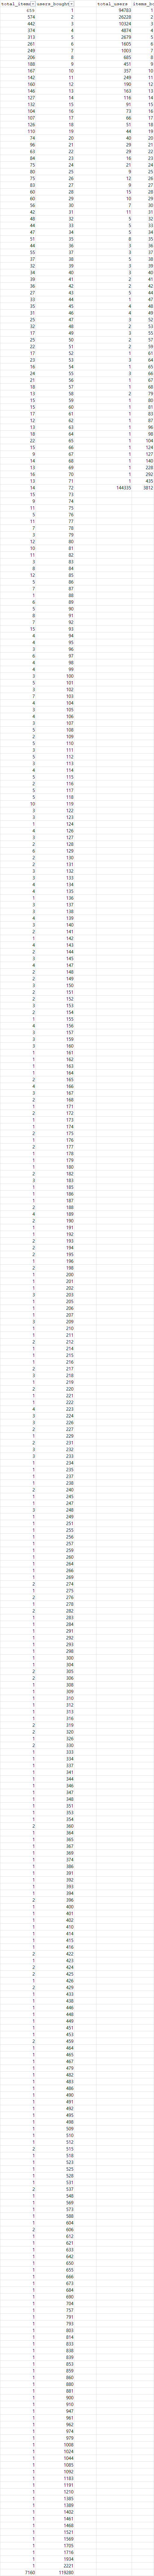

In [ ]:
mc_rr_df_read_cp.head()

,item_id,size,rating,category,user_name,length,fit,user_id,review_summary,review_text,waist,hips,bust_size,height,cup_size_in_cms,rented_for,body_type,age,review_date,weight
0,152702,4,4.0,new,avNYC,just right,small,668176,Too much ruching,"I liked the color, the silhouette, and the fab...",27.0,37.000000,32.0,167.64,14.5,NaN,NaN,NaN,NaN,NaN
1,152702,4,5.0,new,lanwei91,slightly short,fit,320759,Suits my body type!,From the other reviews it seems like this dres...,26.0,36.000000,34.0,167.64,16.5,NaN,NaN,NaN,NaN,NaN
2,152702,4,3.0,new,angeladevoe5678,just right,fit,144785,I love the design and fit,I love the design and fit of this dress! I wo...,25.0,35.765625,34.0,160.02,12.5,NaN,NaN,NaN,NaN,NaN
3,152702,4,3.0,new,Juli,slightly long,fit,52664,Beautiful Dress!,I bought this dress for work it is flattering...,25.0,35.000000,32.0,154.94,16.5,NaN,NaN,NaN,NaN,NaN
4,152702,4,5.0,new,lhalton,just right,fit,155439,This is a very profession,This is a very professional look. It is Great ...,25.0,32.000000,32.0,167.64,16.5,NaN,NaN,NaN,NaN,NaN


In [ ]:
total_items

In [13]:
mc_rr_df_read_cp.item_id.value_counts()

126335     2221
539980     1934
174086     1716
123793     1705
132738     1569
           ... 
2352435       1
530323        1
187825        1
526689        1
2751662       1
Name: item_id, Length: 7160, dtype: int64

In [3]:
# Users who bought so many items
users_bought = []
total_items = []
for i in range(min(mc_rr_df_read_cp.item_id.value_counts()), max(mc_rr_df_read_cp.item_id.value_counts())+1):
    all_items = sum(mc_rr_df_read_cp.item_id.value_counts() == i)
    if all_items != 0:
        total_items.append(all_items)
        users_bought.append(i)
plt.xlabel("Number of users bought", fontsize = 18)
plt.ylabel("Number of items", fontsize = 18)
plt.title("Distribution of users bought")
__ = sns.barplot(x=users_bought, y=total_items, color='y')
fig = plt.gcf()
fig.set_size_inches(300,250)

NameError: ignored

### 이웃기반 추천(아이템 기반 협업필터링 수행) : 아이템 유사도 행렬을 구한 후 사용자에 대해 아직 평점을 남기지 않은 아이템에 대한 평점예측 수행

In [8]:
ratings_df = pd.DataFrame(mc_rr_df_read_cp[['user_id',	'item_id', 'rating']])#,  'review_summary', 'category', 'rented_for', 'body_type']]

In [ ]:

ratings_df.drop_duplicates(inplace = True)

gby_radf=ratings_df.groupby(by = ['user_id', 'item_id']).count()

#gby_radf2 = gby_radf2.count()
#gby_radf['rating'][(37641, 654079)]

df_dup = gby_radf[gby_radf['rating'] > 1]['rating']

#ratings_df2.drop_duplicates(inplace = True)

for index, row in gby_radf.iterrows():
    if gby_radf['rating'][index] > 1 :
            print(ratings_df[(ratings_df['user_id'] == index[0]) & (ratings_df['item_id'] == index[1])]['rating'])
            print(sum(ratings_df[(ratings_df['user_id'] == index[0]) & (ratings_df['item_id'] == index[1])]['rating']))
            print(gby_radf['rating'][index])


for index, row in gby_radf.iterrows():
    if gby_radf['rating'][index] > 1 :
            sum_val = sum(ratings_df[(ratings_df['user_id'] == index[0]) & (ratings_df['item_id'] == index[1])]['rating'])
            val_cnt = gby_radf['rating'][index]
            ratings_df.loc[(ratings_df['user_id'] == index[0]) & (ratings_df['item_id'] == index[1]), 'rating'] = sum_val / 2


ratings_df.drop_duplicates(inplace = True)


In [54]:
ratings_df

,user_id,item_id,rating
0,668176,152702,4.0
1,320759,152702,5.0
4,155439,152702,5.0
5,944346,152702,4.0
6,986184,152702,4.0
...,...,...,...
265591,41453,326784,4.0
265592,66386,2252812,5.0
265593,118398,682043,5.0
265594,47002,683251,3.0


In [3]:
gby_radf2=ratings_df.groupby(by = ['user_id']).count()

#gby_radf2 = gby_radf2.count()
#gby_radf['rating'][(37641, 654079)]

df_user_1 = gby_radf2[gby_radf2['rating'] <= 8]

for index, row in df_user_1.iterrows():
    ratings_df.drop(ratings_df[ratings_df['user_id'] == index].index, inplace = True)


In [6]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54517 entries, 0 to 67911
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  54517 non-null  int64  
 1   item_id  54517 non-null  int64  
 2   rating   54517 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.7 MB


In [64]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265678 entries, 0 to 265677
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  265678 non-null  int64  
 1   item_id  265678 non-null  int64  
 2   rating   265678 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 6.1 MB


In [15]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265597 entries, 0 to 265677
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  265597 non-null  int64  
 1   item_id  265597 non-null  int64  
 2   rating   265597 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 8.1 MB


In [4]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/GitHub/AI-ExpertFW-Prj/dataset')

#ratings_df.to_excel('ratings_df.xlsx', index = False)

#ratings_df = pd.read_excel('ratings_df.xlsx')

In [5]:
train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=1234)

In [6]:
print(train_df.shape)
print(test_df.shape)

(25926, 3)
(6482, 3)


In [7]:
sparse_matrix = train_df.groupby('item_id').apply(lambda x: pd.Series(x['rating'].values, index=x['user_id'])).unstack()
sparse_matrix.index.name = 'item_id'

In [8]:
# 코사인 유사도 활용하기
from sklearn.metrics.pairwise import cosine_similarity

def cossim_matrix(a, b):
    cossim_values = cosine_similarity(a.values, b.values)
    cossim_df = pd.DataFrame(data=cossim_values, columns = a.index.values, index=a.index)

    return cossim_df

### Neighborhood-based 협업필터링 추천점수 계산하기
### item based

In [9]:
item_sparse_matrix = sparse_matrix.fillna(0)

item_sparse_matrix.shape

(5339, 2154)

In [10]:
item_sparse_matrix

user_id,1134,1434,2042,2105,2645,2927,2968,3739,4443,4472,...,996512,997189,997237,997360,998194,998429,998563,998923,999183,999231
item_id,,,,,,,,,,,,,,,,,,,,,
123373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2963850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2965009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
item_cossim_df = cossim_matrix(item_sparse_matrix, item_sparse_matrix)

In [12]:
item_cossim_df.shape

(5339, 5339)

In [13]:
item_cossim_df

,123373,123793,124204,124553,125424,125465,125564,126335,127081,127495,...,2960025,2960913,2960969,2961855,2962646,2963344,2963850,2965009,2965924,2966087
item_id,,,,,,,,,,,,,,,,,,,,,
123373,1.000000,0.00000,0.000000,0.030578,0.112803,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
123793,0.000000,1.00000,0.000000,0.000000,0.045910,0.036035,0.089759,0.000000,0.0,0.074101,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
124204,0.000000,0.00000,1.000000,0.101025,0.000000,0.000000,0.000000,0.061813,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.124226,0.0,0.0,0.0
124553,0.030578,0.00000,0.101025,1.000000,0.085056,0.038149,0.000000,0.045569,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
125424,0.112803,0.04591,0.000000,0.085056,1.000000,0.000000,0.000000,0.075189,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963344,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.199522,...,0.0,0.0,0.000000,0.0,0.0,1.000000,0.223607,0.0,0.0,0.0
2963850,0.000000,0.00000,0.124226,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.223607,1.000000,0.0,0.0,0.0
2965009,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0


In [14]:
# movieId: 8938개, userId: 610개
# train_df에 포함된 userId를 계산에 반영한다
userId_grouped = train_df.groupby('user_id')
# index: userId, columns: total movieId
item_prediction_result_df = pd.DataFrame(index=list(userId_grouped.indices.keys()), columns=item_sparse_matrix.index)

In [17]:
item_prediction_result_df

item_id,123373,123793,124204,124553,125424,125465,125564,126335,127081,127495,...,2960913,2960940,2960969,2961855,2962646,2963344,2963850,2965009,2965924,2966087
238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#7.3의 마지막 부분 for user_id in tqdm(test_userids):로 시작하는 셀 참고(거의 비슷한 로직, 사용자가 평점을 매긴 데이터르 기반으로 cos_sim 수치를 이용해 평점을 안매긴 다른 평점을 예측)
for user_id, group in tqdm(userId_grouped):
    # user가 rating한 movieId * 전체 movieId
    user_sim = item_cossim_df.loc[group['item_id']]
    # user가 rating한 movieId * 1
    user_rating = group['rating']
    # 전체 movieId * 1
    sim_sum = user_sim.sum(axis=0)

    # userId의 전체 rating predictions (8938 * 1)
    pred_ratings = np.matmul(user_sim.T.to_numpy(), user_rating) / (sim_sum+1)
    item_prediction_result_df.loc[user_id] = pred_ratings

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/2154 [00:00<?, ?it/s]

In [19]:
item_prediction_result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5444 entries, 238 to 999431
Columns: 5731 entries, 123373 to 2966087
dtypes: object(5731)
memory usage: 238.2+ MB


In [16]:
item_prediction_result_df.head()

item_id,123373,123793,124204,124553,125424,125465,125564,126335,127081,127495,...,2960025,2960913,2960969,2961855,2962646,2963344,2963850,2965009,2965924,2966087
1134,0.0,0.546121,0.0,0.0,0.0,0.0,0.413727,0.114448,0.21275,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1434,0.0,0.245462,0.148532,0.0,0.884338,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.571566,0.0,0.0,0.0,0.0,0.0
2042,0.0,0.0,0.0,0.0,0.298676,0.523766,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.753569,0.0,0.629515,0.0,0.752001,0.0
2105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.563524,0.0,0.0,0.0,0.0,0.0,1.079172,0.0,0.0,0.0
2645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.189593,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998429,0.0,0.809811,0.0,0.0,0.0,0.0,0.427547,0.0,0.20015,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998563,0.0,0.0,0.0,0.359157,0.609588,0.0,0.0,0.074561,0.0,0.170389,...,0.0,0.0,0.0,0.0,0.270754,1.346415,1.243296,0.362502,0.0,0.0
998923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.903454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999183,0.0,0.222703,0.0,0.111505,0.514831,0.0,0.0,0.0,0.0,0.288077,...,0.0,0.0,0.454811,0.0,1.308057,0.0,0.0,1.280355,0.0,0.520598


In [17]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/GitHub/AI-ExpertFW-Prj/dataset')

#item_prediction_result_df.to_excel('item_prediction_result_df.xlsx', index = False)

#item_prediction_result_df = pd.read_excel('item_prediction_result_df.xlsx')

In [ ]:
def evaluate(test_df, prediction_result_df):
    groups_with_movie_ids = test_df.groupby(by='item_id')
    groups_with_user_ids = test_df.groupby(by='user_id')
    intersection_movie_ids = sorted(list(set(list(prediction_result_df.columns)).intersection(set(list(groups_with_movie_ids.indices.keys())))))
    intersection_user_ids = sorted(list(set(list(prediction_result_df.index)).intersection(set(groups_with_user_ids.indices.keys()))))
    compressed_prediction_df = prediction_result_df.loc[intersection_user_ids][intersection_movie_ids]

    # test_df에 대해서 RMSE 계산
    grouped = test_df.groupby(by='user_id')
    result_df = pd.DataFrame(columns=['rmse'])
    for userId, group in tqdm(grouped):
        if userId in intersection_user_ids:
            pred_ratings = compressed_prediction_df.loc[userId][compressed_prediction_df.loc[userId].index.intersection(list(group['item_id'].values))]
            pred_ratings = pred_ratings.to_frame(name='rating').reset_index().rename(columns={'index':'item_id','rating':'pred_rating'})
            actual_ratings = group[['rating', 'item_id']].rename(columns={'rating':'actual_rating'})
            final_df = pd.merge(actual_ratings, pred_ratings, how='inner', on=['item_id'])
            final_df = final_df.round(4) # 반올림

    return final_df

In [48]:
# 아이템 기반 모델 평가 -> 성능이 좀 더 좋음
result_df = evaluate(test_df, item_prediction_result_df)

item_id,123373,123793,124204,124553,125424,125465,125564,126335,127081,127495,...,2960025,2960913,2960969,2961855,2962646,2963344,2963850,2965009,2965924,2966087
1134,0.0,0.546121,0.0,0.0,0.0,0.0,0.413727,0.114448,0.21275,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1434,0.0,0.245462,0.148532,0.0,0.884338,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.571566,0.0,0.0,0.0,0.0,0.0
2042,0.0,0.0,0.0,0.0,0.298676,0.523766,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.753569,0.0,0.629515,0.0,0.752001,0.0
2105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.563524,0.0,0.0,0.0,0.0,0.0,1.079172,0.0,0.0,0.0
2645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.189593,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998429,0.0,0.809811,0.0,0.0,0.0,0.0,0.427547,0.0,0.20015,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998563,0.0,0.0,0.0,0.359157,0.609588,0.0,0.0,0.074561,0.0,0.170389,...,0.0,0.0,0.0,0.0,0.270754,1.346415,1.243296,0.362502,0.0,0.0
998923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.903454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999183,0.0,0.222703,0.0,0.111505,0.514831,0.0,0.0,0.0,0.0,0.288077,...,0.0,0.0,0.454811,0.0,1.308057,0.0,0.0,1.280355,0.0,0.520598


In [41]:
result_df

,actual_rating,item_id,pred_rating
0,5.0,2725433,0.0
1,5.0,1936497,0.0
2,5.0,2521310,0.0
3,5.0,661589,0.529507
4,5.0,655775,0.919392
5,5.0,1852099,0.441356
6,5.0,1876426,0.0


In [22]:
from sklearn.metrics import mean_squared_error

print(f"RMSE: {sqrt(mean_squared_error(result_df['actual_rating'].values, result_df['pred_rating'].values))}")

RMSE: 4.742180138217888
